# Executive Summary

InsaidTelecom, one of the leading telecom players, understands that customizing offering is very important for its business to stay competitive. Currently, InsaidTelecom is seeking to leverage behavioral data from more than 60% of the 50 million mobile devices active daily in India to help its clients better understand and interact with their audiences.

Their clients and business partners include mobile device manufacturers and advertisers around the world and therefore Insaid Telecom intends to support them with appropriate data-driven marketing efforts which are relevant to their users and catered to their preferences.

Insaid Telecom has engaged Insaid group 1007 to carry out data analysis on the 6 states (Bihar, Gujarat, Karnataka, Kerala,  Punjab and WestBengal) and build a dashboard to understand the user's demographic characteristics based on their mobile usage, geolocation, and mobile device properties.

# Objective

The goal is to build the dashboard showcasing the user demographics based on available information.

## Datasource and Dataset

### About the Dataset

There are 3 datasets provided:
- (i) Events dataset: This is a dataset of 3252573 events with 6 distinguishing factors of each of the events
- (ii) User dataset: This is a dataset of 74645 users with 3 distinguishing factors for each of the user.
- (iii) Phone dataset: This is a dataset of 87726 devices with 2 distinguishing factors for each of the device.

### Datasource

- (i) Events dataset: https://drive.google.com/file/d/1Ir3rW0YTKmk7MSjVjCU_UGMQevhe1v9W/view
- (ii) User dataset and Phone dataset: provided MySQL instance.
- host	'cpanel.insaid.co'
- user	'student'
- passwd	'student'
- database	'Capstone1' 

## Data Attributes

(i) Events dataset: The dataset consists of 3252573 events with 6 distinguishing factors of each of the events, the details of which  are as follows:
- __event_id__: The uniqiue ID of the event (Type: Id)<br>
- __device_id__: The device ID pertaining to the event  (Type: Categorical)<br>
- __timestamp__: The timestamp pertaining to the event (Type: Datetime)<br>
- __longitude__: The longitude pertaining to the event (Type: Categorical)<br>
- __latitude__:  The latitude pertaining to the event (Type: Categorical)<br>
- __city__: The city pertaining to the event (Type: Categorical)<br>
- __state__: The state pertaining to the event (Type: Categorical)<br>


(ii) User dataset: The dataset consists of 74645 users with 3 distinguishing factors for each of the user, the details of which are as follows:
- __device_id__: The uniqiue ID of the device pertaining to the user (Type: Id)<br>
- __gender__: The gender of the user  (Type: Categorical)<br>
- __age__: The age of the user (Type: Categorical)<br>
- __group__: The age group pertaining to the user (Type: Categorical)<br>

(ii) Phone dataset: The dataset consists of 87726 devices users with 2 distinguishing factors for each of the device, the details of which are as follows:
- __device_id__: The uniqiue ID of the device pertaining to the user (Type: Id)<br>
- __phone_brand__: The phone brand of the device  (Type: Categorical)<br>
- __device_model__: The device model of the device (Type: Categorical)<br>

# Problem Statement

Analysis is being carried out to build the dashboard and showcase user demographics in the 6 target states (Bihar, Gujarat, Punjab, Karnataka, Kerala & West Bengal).

Following are the questions one can seek answers for in the consolidated user dataset:
*   What is the count and split of users by gender?
  - across the nation
  - across each of the 6 target states
*   What is the count and split of users across nation in the dataset by gender and age?
  - across the nation
  - across each of the 6 target states
*   What are the top 10 phone brands and their user coverage?
  - across the nation
  - across each of the 6 target states
*	What are the top 5 cities from the 6 states with highest mobile usage.
*   How many events are generated by user?
  - across the nation
  - across each of the 6 target states
*   What is the hourly distribution of phone calls?
  - across the nation
  - across each of the 6 target states
*   What is the events to device ratio?
  - across the nation
  - across each of the 6 target states
*   What is the events to population ratio?
  - across the nation
  - across each of the 6 target states
*   What is the device to population ratio?
  - across the nation
  - across each of the 6 target states

# Loading packages and data

In [1]:
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling
import sweetviz as sv
import datetime
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.
import plotly.express as px

from subprocess import check_output

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Loading the events dataset

In [3]:
url1 = r'C:\Data\events_data.csv'
df_events_original = pd.read_csv(url1)
df_events_original.sample(5)
df_events_original.info()

,event_id,device_id,timestamp,longitude,latitude,city,state
60743,1936876,-3.765951e+18,2016-05-04 15:28:49,73.046500,19.278764,Thana,Maharashtra
1517932,827934,8.997229e+18,2016-05-06 21:12:45,77.275321,28.754436,Delhi,Delhi
2300984,76004,-8.783851e+18,2016-05-04 06:21:41,77.266358,28.754409,Delhi,Delhi
1263878,1638786,-1.716886e+18,2016-05-01 08:55:50,77.243225,28.734192,Delhi,Delhi
3071459,1676343,-4.817472e+18,2016-05-05 10:10:59,77.247494,28.743740,Delhi,Delhi


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


## Loading the user dataset

In [ ]:
pip install mysql-connector-python

In [4]:
import mysql.connector as mysql

In [5]:
db = mysql.connect(
    host = "cpanel.insaid.co",
    user = "student",
    passwd = "student",
    database = "Capstone1"
)
cursor = db.cursor()
table1 = "gender_age_train"
query = ("SELECT * from {}".format(table1))

cursor.execute(query)

num_fields = len(cursor.description)
field_names = [i[0] for i in cursor.description]

records = cursor.fetchall()
cursor.close()
db.close()

df_user_original = pd.DataFrame(data=records, columns=field_names)
df_user_original.sample(5)
df_user_original.info()

True

,device_id,gender,age,group
72203,-1987114797905605804,M,24,M23-26
65529,-6097117379299362009,M,28,M27-28
53254,1098423665791580048,M,19,M22-
41963,-200813741773675209,F,33,F33-42
50820,3902944261995907631,F,19,F23-


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


## Loading the phone dataset

In [6]:
db = mysql.connect(
    host = "cpanel.insaid.co",
    user = "student",
    passwd = "student",
    database = "Capstone1"
)
cursor = db.cursor()
table2 = "phone_brand_device_model"
query = ("SELECT * from {}".format(table2))

cursor.execute(query)

num_fields = len(cursor.description)
field_names = [i[0] for i in cursor.description]

records = cursor.fetchall()
cursor.close()
db.close()

df_phone_original = pd.DataFrame(data=records, columns=field_names)
df_phone_original.sample(5)
df_phone_original.info()

True

,device_id,phone_brand,device_model
77889,-4800997596148704622,酷派,7295A青春版
31381,8400791882228751919,vivo,Y23L
83604,1591645018598139003,三星,Galaxy S5
45828,5339377616626689437,优米,3
59706,-3447778395057553116,vivo,X5Max+


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


# Reviewing the Datasets

## Creating a copy of all the 3 datasets

In [7]:
df_events = df_events_original.copy()
df_user = df_user_original.copy()
df_phone = df_phone_original.copy()

 ## Converting data type of device_id for user & phone datasets

In [8]:
df_user['device_id'] = df_user['device_id'].astype('float')
df_phone['device_id'] = df_phone['device_id'].astype('float')
df_user.info()
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   device_id  74645 non-null  float64
 1   gender     74645 non-null  object 
 2   age        74645 non-null  int64  
 3   group      74645 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   device_id     87726 non-null  float64
 1   phone_brand   87726 non-null  object 
 2   device_model  87726 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.0+ MB


## Reviewing the Events dataset (df_events)

In [9]:
# Checking the columns of the dataset df_events

df_events.describe(include ='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
event_id,3.25295e+06,NaN,NaN,NaN,1.62648e+06,939046,1,813238,1.62648e+06,2.43971e+06,3.25295e+06
device_id,3.2525e+06,NaN,NaN,NaN,1.0122e+17,5.31676e+18,-9.22296e+18,-4.54061e+18,1.72682e+17,4.86181e+18,9.22285e+18
timestamp,3252950,588126,2016-05-03 10:00:03,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,3.25253e+06,NaN,NaN,NaN,78.1587,4.23557,12.567,75.8354,77.2681,80.3192,95.4595
latitude,3.25253e+06,NaN,NaN,NaN,21.6885,5.78911,8.19011,17.8017,22.1645,28.6828,41.8719
city,3252950,933,Delhi,744276,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,3252573,32,Delhi,751733,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [11]:
# Defining fuction to enlist missing values in  datasets

def lr(dataset):
    # Count total missing and sort it
    # Calculate percent 
    # concatenate total and percent 
    # print missing data assigning a varibale
    # return using your created variable
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total,percent],axis=1,keys = ['Total','Percent'])
    return missing_data

In [12]:
# Finding missing values in events dataset
lr(df_events)

,Total,Percent
device_id,453,0.013926
latitude,423,0.013004
longitude,423,0.013004
state,377,0.011589
city,0,0.000000
timestamp,0,0.000000
event_id,0,0.000000


__Observation__:
- We have missing values in state, lattitude and longitude and the values need to be computed with the corresponding values pertaining to the city
- We have missing values in state and device_id and the missing values can be computed by its respective mode.

In [13]:
# Pulling the rows having missing values in the dataset df_events

null_data1 = df_events[df_events.isnull().any(axis=1)]

In [14]:
null_data1

,event_id,device_id,timestamp,longitude,latitude,city,state
2055,1936567,NaN,2016-05-02 15:27:54,75.882956,22.814519,Indore,MadhyaPradesh
2931,706554,-5.829328e+18,2016-05-05 16:58:46,73.851671,18.593313,Pune,NaN
8015,2929521,1.779631e+18,2016-05-05 01:15:22,NaN,NaN,Delhi,Delhi
9697,1017749,-8.790560e+18,2016-05-03 17:22:52,NaN,NaN,Indore,MadhyaPradesh
10949,2132415,4.865607e+18,2016-05-07 19:57:06,NaN,NaN,Visakhapatnam,AndhraPradesh
...,...,...,...,...,...,...,...
3240304,2387314,-7.364841e+18,2016-05-05 06:20:46,NaN,NaN,Pune,Maharashtra
3242228,1082720,-5.330179e+18,2016-05-06 07:54:36,75.894057,26.949746,Jaipur,NaN
3246545,2857050,4.580179e+18,2016-05-07 14:25:41,NaN,NaN,Jaipur,Rajasthan
3249260,1565626,2.350979e+18,2016-05-03 22:31:58,NaN,NaN,Indore,MadhyaPradesh


In [15]:
null_data1['city'].unique()

array(['Indore', 'Pune', 'Delhi', 'Visakhapatnam', 'Chennai', 'Jaipur',
       'Hoshiarpur', 'Channapatna', 'Gangarampur', 'Araria', 'Arambagh',
       'Bardoli', 'Jetpur', 'Moga', 'Bagaha'], dtype=object)

In [16]:
for i in list(null_data1['city'].unique()):
  mean1 = df_events[df_events['city']==i]['latitude'].mean()
  df_events.loc[((df_events['city']==i) & (df_events['latitude'].isnull())),'latitude'] = mean1
  mean2 = df_events[df_events['city']==i]['longitude'].mean()
  df_events.loc[((df_events['city']==i) & (df_events['longitude'].isnull())),'longitude'] = mean2
  mode = df_events[df_events['city']==i]['state'].mode()
  df_events.loc[((df_events['city']==i) & (df_events['state'].isnull())),'state'] = mode[0]
  mode1 = df_events[df_events['city']==i]['device_id'].mode()
  df_events.loc[((df_events['city']==i) & (df_events['device_id'].isnull())),'device_id'] = mode1[0]


In [17]:
# Check for missing values
lr(df_events)

,Total,Percent
state,0,0.0
city,0,0.0
latitude,0,0.0
longitude,0,0.0
timestamp,0,0.0
device_id,0,0.0
event_id,0,0.0


## Reviewing the User dataset (df_user)

In [18]:
# Checking the columns of th dataset df_user
df_user.describe(include ='all').transpose()
df_user.info()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
device_id,74645,NaN,NaN,NaN,-7.49135e+14,5.32715e+18,-9.22307e+18,-4.61737e+18,-1.84136e+16,4.63666e+18,9.22285e+18
gender,74645,2,M,47904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,74645,NaN,NaN,NaN,31.4103,9.86873,1,25,29,36,96
group,74645,12,M23-26,9605,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   device_id  74645 non-null  float64
 1   gender     74645 non-null  object 
 2   age        74645 non-null  int64  
 3   group      74645 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


**Observation**:
1.   There is no missing value in the user datasetList item
2.   There are 2 genders Male and Female
3. The age of users range between 1 yr and 96 yrs with its median at 28 years.

In [19]:
# Validating for the missing values in user dataset
lr(df_user)

,Total,Percent
group,0,0.0
age,0,0.0
gender,0,0.0
device_id,0,0.0


In [20]:
df_user['group'].value_counts()

M23-26    9605
M32-38    9476
M39+      8581
M22-      7488
M29-31    7309
F33-42    5561
M27-28    5445
F23-      5050
F29-32    4628
F43+      4194
F24-26    4190
F27-28    3118
Name: group, dtype: int64

In [21]:
# Since the column 'group' has lot of redundant values and the same are gender dependent, we can drop this column
df_user.drop(columns = ['group'], inplace = True)

## Reviewing the Phone dataset (df_phone)

In [22]:
# Checking the columns of th dataset df_phone
df_phone.describe(include ='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
device_id,87726,NaN,NaN,NaN,-5.21256e+15,5.33016e+18,-9.22332e+18,-4.62333e+18,-3.1098e+16,4.63519e+18,9.22285e+18
phone_brand,87726,116,小米,21645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
device_model,87726,1467,红米note,3500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observation**:
1.   There are no missing values in this dataset



In [23]:
# Validating for the missing values in phone dataset

lr(df_phone)

,Total,Percent
device_model,0,0.0
phone_brand,0,0.0
device_id,0,0.0


## Merging the all the 3 datasets to obtain master dataset df_master

The column in common to all the 3 datasets in device_id, we will use device id. Using the same to merge the datasets and create a new dataset master_df

In [24]:
master_df = df_events.merge(df_user, how = 'left',on='device_id')
master_df = master_df.merge(df_phone, how = 'left',on='device_id')

In [25]:
master_df.shape

(3252950, 11)

In [26]:
# Checking for missing values in master_df post merging
lr(master_df)

,Total,Percent
device_model,0,0.0
phone_brand,0,0.0
age,0,0.0
gender,0,0.0
state,0,0.0
city,0,0.0
latitude,0,0.0
longitude,0,0.0
timestamp,0,0.0
device_id,0,0.0


In [28]:
df_brand = pd.DataFrame(data=master_df['phone_brand'].unique())
df_brand.columns=['phone_brand']

from googletrans import Translator
translator = Translator()

df_brand["phone_brand_en"] = df_brand["phone_brand"].map(lambda x: translator.translate(x, src="zh-CN", dest="en").text)
df_brand.sample(5)

,phone_brand,phone_brand_en
50,语信,Language letter
0,优米,Quality rice
79,鲜米,Fresh rice
10,中国移动,China Mobile
99,恒宇丰,Hengyufeng


In [31]:
df_master_brand_en = pd.merge(master_df, df_brand, on='phone_brand', how='left')
df_master_brand_en.sample(5)

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,phone_brand,device_model,phone_brand_en
2078655,757676,7.375910e+18,2016-05-06 23:58:45,78.442975,17.558795,Kukatpalle,AndhraPradesh,F,32,三星,Galaxy Note 3,Samsung
1456892,397359,-5.140746e+18,2016-05-06 21:01:53,77.300593,28.749322,Delhi,Delhi,F,51,华为,Ascend G7,Huawei
1916416,1440747,6.398837e+18,2016-05-03 00:26:01,75.436430,12.065503,Talipparamba,Kerala,F,24,OPPO,R7,OPPO
128925,1701357,-3.331335e+18,2016-05-02 00:42:44,75.844641,27.011952,Jaipur,Rajasthan,M,39,酷派,8720L,Coolpad
1762670,476512,7.964088e+18,2016-05-03 00:23:55,75.958341,22.801863,Indore,MadhyaPradesh,F,34,三星,Galaxy Note 3,Samsung


In [32]:
df_model_map = pd.DataFrame(data=df_master_brand_en['device_model'].unique())
df_model_map.columns=['device_model']
df_model_map.sample(5)

,device_model
1203,P331M
99,大神Note3
512,Ascend G700
768,S810t
225,Galaxy J3


In [33]:
df_model = pd.DataFrame(data=df_master_brand_en['device_model'].unique())
df_model.columns=['device_model']

from googletrans import Translator
translator = Translator()

df_model["device_model_en"] = df_model["device_model"].map(lambda x: translator.translate(x, src="zh-CN", dest="en").text)
df_model.sample(5)

,device_model,device_model_en
401,G7200,G7200
129,memo 5S,memo 5S
816,R811,R811
366,8076D,8076D
1084,M15,M15


In [34]:
df_master_phone_en = pd.merge(df_master_brand_en, df_model, on='device_model', how='left')
df_master_phone_en.sample(5)
df_master_phone_en.info()

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,phone_brand,device_model,phone_brand_en,device_model_en
251281,653257,-8.783851e+18,2016-05-02 04:58:26,77.266358,28.754409,Delhi,Delhi,F,43,三星,Galaxy Grand 2,Samsung,Galaxy Grand 2
2863549,2119370,4.234509e+17,2016-05-02 18:58:43,80.302410,13.124484,Chennai,TamilNadu,F,25,vivo,Y613F,vivo,Y613F
529470,709931,8.206431e+18,2016-05-03 14:32:02,77.227171,28.703196,Delhi,Delhi,M,23,三星,Galaxy A7,Samsung,Galaxy A7
2385224,90651,9.177227e+18,2016-05-04 15:05:09,75.891494,22.819527,Indore,MadhyaPradesh,F,25,OPPO,A53,OPPO,A53
1298037,1119884,-9.124515e+18,2016-05-05 14:45:50,80.342320,13.139488,Chennai,TamilNadu,M,33,三星,Galaxy A7,Samsung,Galaxy A7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252950 entries, 0 to 3252949
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   event_id         int64  
 1   device_id        float64
 2   timestamp        object 
 3   longitude        float64
 4   latitude         float64
 5   city             object 
 6   state            object 
 7   gender           object 
 8   age              int64  
 9   phone_brand      object 
 10  device_model     object 
 11  phone_brand_en   object 
 12  device_model_en  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 347.5+ MB


In [35]:
df_final = df_master_phone_en.copy()

In [38]:
for j in ['device_id','city','state','gender','phone_brand_en','device_model_en']:
    df_final[j] = df_final[j].astype('str')

In [39]:
df_final['device_id'] = df_final['device_id'].str.replace('-','')
df_final.sample(5)
df_final.info()

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,phone_brand,device_model,phone_brand_en,device_model_en
207555,1596791,1.2443630847503404e+18,2016-05-04 05:08:02,88.421918,22.595340,Haora,WestBengal,F,27,三星,A320t,Samsung,A320t
34417,2889004,8.087282213429484e+18,2016-05-02 20:27:57,83.038160,25.335028,Varanasi,UttarPradesh,F,21,小米,红米note,Xiaomi,Red rice note
2825084,2884382,7.233601437694968e+17,2016-05-05 16:47:59,77.295678,28.765815,Delhi,Delhi,M,24,小米,小米note,Xiaomi,Xiaomi note
496961,2454008,8.594862512851081e+18,2016-05-03 14:08:16,74.837152,19.191073,Ahmadnagar,Maharashtra,M,27,小米,红米note,Xiaomi,Red rice note
1463500,380285,4.311594837403369e+18,2016-05-05 16:28:20,77.308523,28.699715,Delhi,Delhi,M,27,vivo,X5Max+,vivo,X5Max+


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252950 entries, 0 to 3252949
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   event_id         int64  
 1   device_id        object 
 2   timestamp        object 
 3   longitude        float64
 4   latitude         float64
 5   city             object 
 6   state            object 
 7   gender           object 
 8   age              int64  
 9   phone_brand      object 
 10  device_model     object 
 11  phone_brand_en   object 
 12  device_model_en  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 347.5+ MB


In [40]:
df_final['timestamp'] = pd.to_datetime(df_final['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [41]:
df_final['age_group'] = pd.cut(x = df_final['age'], bins = [1,9,19,29,39,49,59,69,79,89,99], labels = ['<10','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99'])

In [42]:
df_final['event_period'] = (df_final['timestamp'].dt.hour % 24 + 4) // 4
df_final['event_period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [43]:
df_final = df_final[df_final.age != 1]

In [44]:
df_final.drop(columns=['phone_brand','device_model'], inplace=True)

In [45]:
region_dict = {'AndamanandNicobarIslands':'Bay_of_Bengal','Chhattisgarh':'Central','MadhyaPradesh':'Central','Bihar':'Eastern','Jharkhand':'Eastern','Orissa':'Eastern','WestBengal':'Eastern','ArunachalPradesh':'North_Eastern','Assam':'North_Eastern','Manipur':'North_Eastern','Meghalaya':'North_Eastern','Mizoram':'North_Eastern','Nagaland':'North_Eastern','Tripura':'North_Eastern','Chandigarh':'Northern','Delhi':'Northern','Haryana':'Northern','HimachalPradesh':'Northern','JammuandKashmir':'Northern','Punjab':'Northern','Rajasthan':'Northern','UttarPradesh':'Northern','Uttaranchal':'Northern','AndhraPradesh':'Southern' ,'Karnataka':'Southern','Kerala':'Southern','Pondicherry':'Southern','TamilNadu':'Southern','Telangana':'Southern','Goa':'Western','Gujarat':'Western','Maharashtra':'Western'}

In [46]:
df_final['region'] = df_final['state'].map(region_dict)

In [47]:
df_final.sample(5)

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,phone_brand_en,device_model_en,age_group,event_period,region
211730,1477761,8.392081753463526e+18,2016-05-01 13:51:28,72.839246,18.976878,Mumbai,Maharashtra,F,24,Xiaomi,MI 4,20-29,Noon,Western
1751979,1428880,1.6305465775525537e+18,2016-05-06 14:56:44,75.938183,22.782374,Indore,MadhyaPradesh,M,68,Samsung,Galaxy Note 3,60-69,Noon,Central
343608,1819758,8.594459081214344e+17,2016-05-01 07:44:22,75.834858,26.956542,Jaipur,Rajasthan,M,38,vivo,Y13iL,30-39,Early Morning,Northern
2642496,1952129,3.4296327613394243e+18,2016-05-04 00:50:36,73.904842,18.556783,Pune,Maharashtra,F,27,vivo,Y35,20-29,Late Night,Western
2670369,1151244,7.983871429718485e+18,2016-05-05 15:07:21,80.335435,13.189053,Chennai,TamilNadu,M,32,Coolpad,Great God F2 Full HD Version,30-39,Noon,Southern


## Pre-Profiling of master_df

In [49]:
profile = pandas_profiling.ProfileReport(df_final)
profile.to_file("profiling_before_preprocessing_v1.0_26july20.html")

In [53]:
df_final.to_csv("final data for dashboard_26july20.csv", index=False)

In [54]:
df_final_EDR = df_final.groupby('device_id')['event_id'].count().reset_index(name='event_count')
df_final_EDR.head()

,device_id,event_count
0,1.000231566338031e+18,44
1,1.000369272589011e+18,3
2,1.0005720558923916e+18,10
3,1.0006432087505178e+18,3
4,1.0008666369272046e+18,1


In [55]:
df_final_EDR.to_csv("device and event count 26july20.csv", index=False)

**Creating a user dataset showcasing the state, city and phone details**

In [51]:
df_user_new = df_final[['device_id','city', 'state', 'gender', 'age', 'phone_brand_en', 'device_model_en']].drop_duplicates()

In [52]:
len(df_user_new)

60864

**What is the count and split of users across the 6 states by gender?**

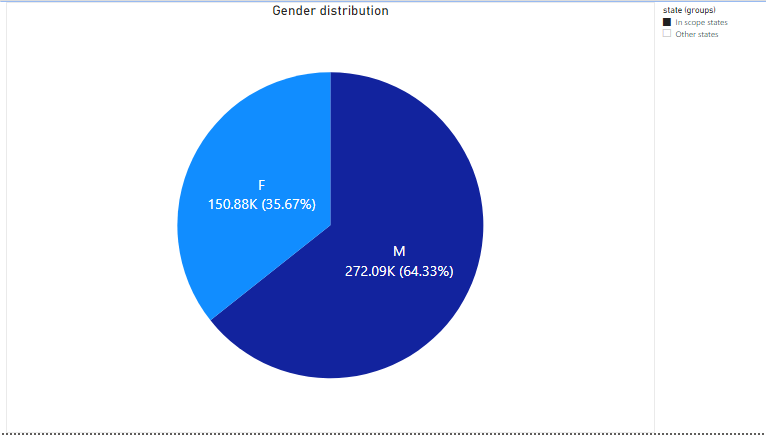

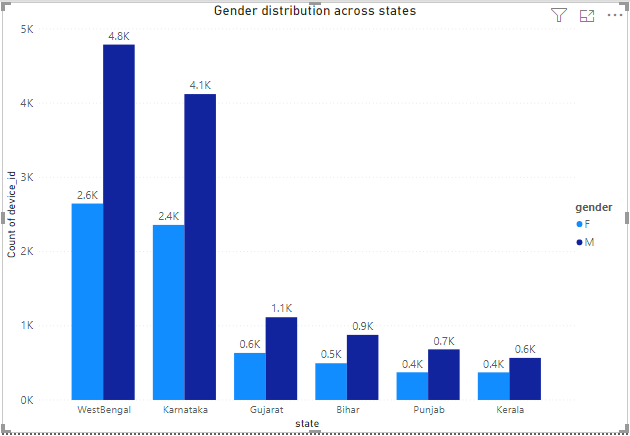

**Observation**:
    
All states have a higher percentage (**~64 %**) of male users. **Kerala** has a **slightly higher % (40 %) of female users** compared to the other 5 states 

**How is the age group distributed?**

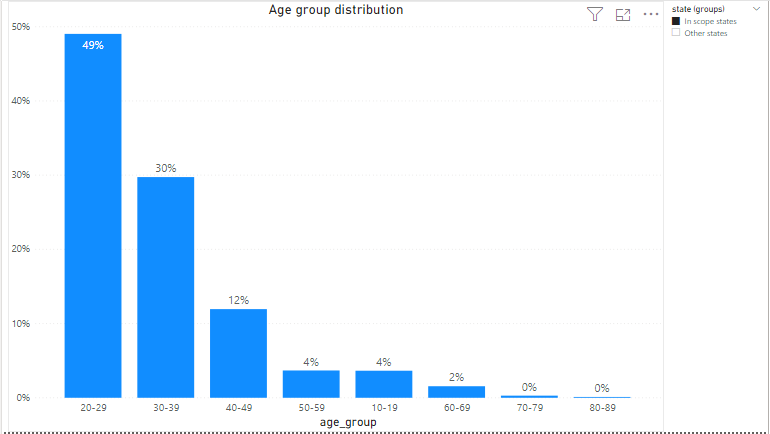

**Observation**:
    
Approximately **80 %** of the users are aged between **20-40 years** and **90 %** aged between **20-50** years. **50 %** of the user base is **<30 years** of age.

**Does age distribution vary across states?**

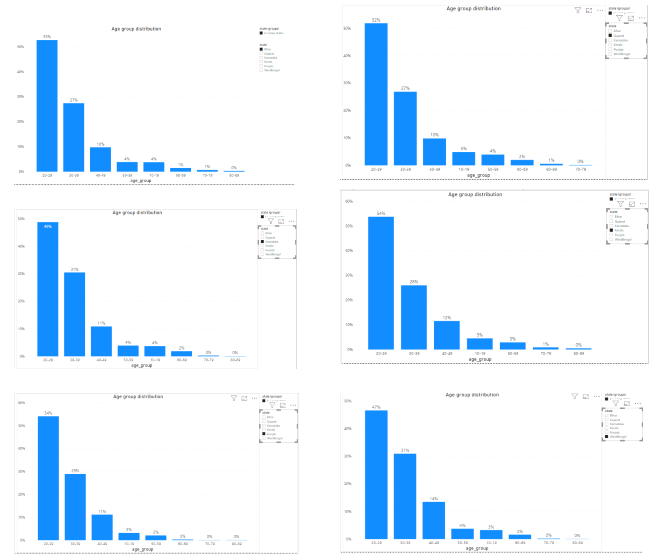

**Observation**:
Age distribution does not vary significantly across the 6 states

**Does Event to Device Ratio (EDR) vary between age groups?**

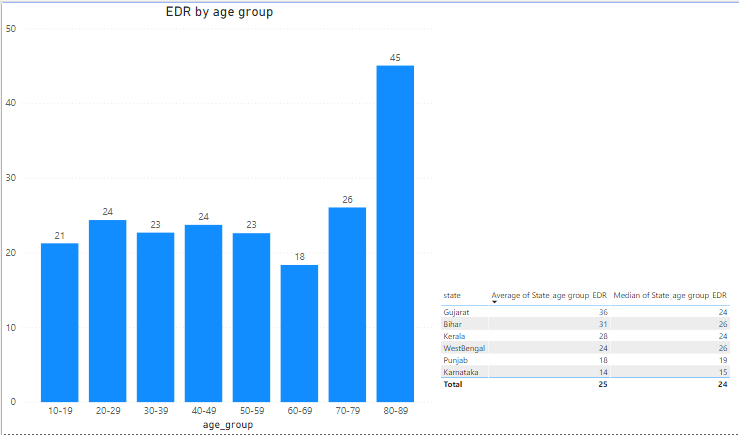

**Observation** : EDR does not vary significantly between the age groups 20-60. EDR is higher for users >=70 years

**Does distribution of events have a recognizable pattern?**

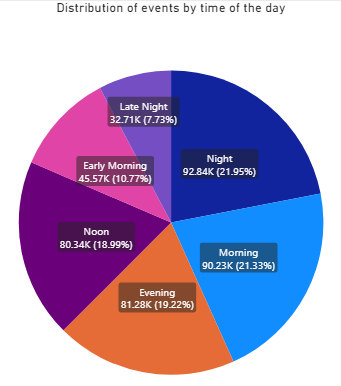

**Observation** : Except early morning (4 AM - 8 AM) and late night (12 AM - 4 AM), events are almost equally distributed throughout the day. Event generation is minimum during the late night period.

**Does event distribution vary between different age groups?**

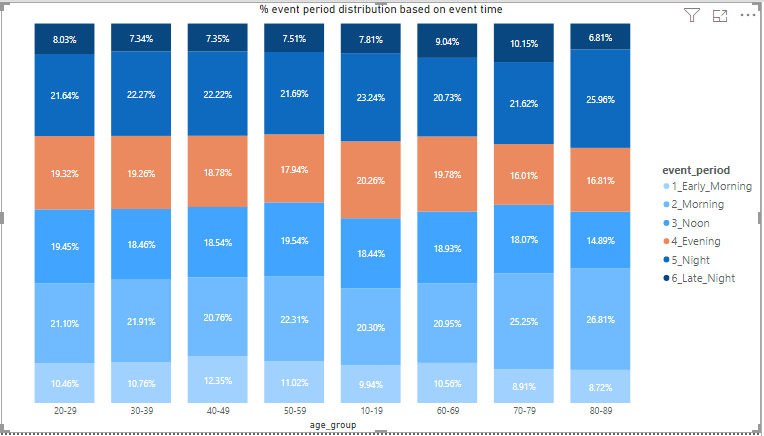

**Observation** : There is no significant variation of events distribution throughout the day between different age groups

**What is the hourly distribution of events across the 6 states?**

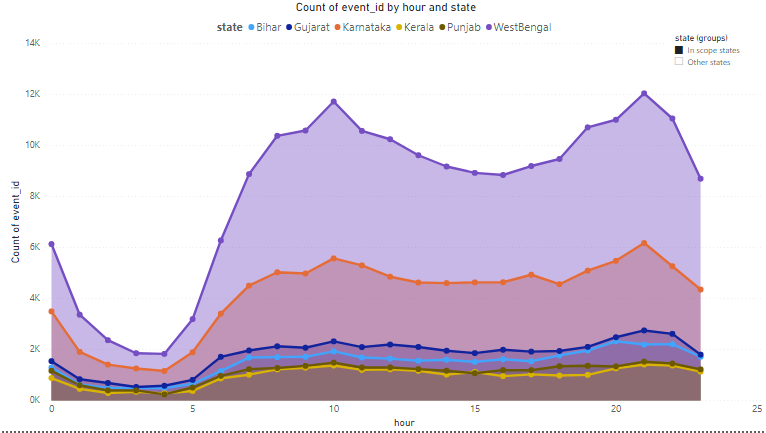

**Observation** :

From 4 AM onwards till 10 AM, there is an increasing trend in the number of events for all the 6 states.

From 10 AM onwards till 4 PM, there is a decreasing trend in the number of events for the 6 states. 

From 4 PM onwards till 9 PM, there is again an increasing event trend observed, followed by a decreasing event trend from 9 PM to 4 AM

West Bengal & Karnataka have a higher variation in event counts compared to the other 4 states. 

**Which states are performing well considering the number of devices and events with respect to their population?**

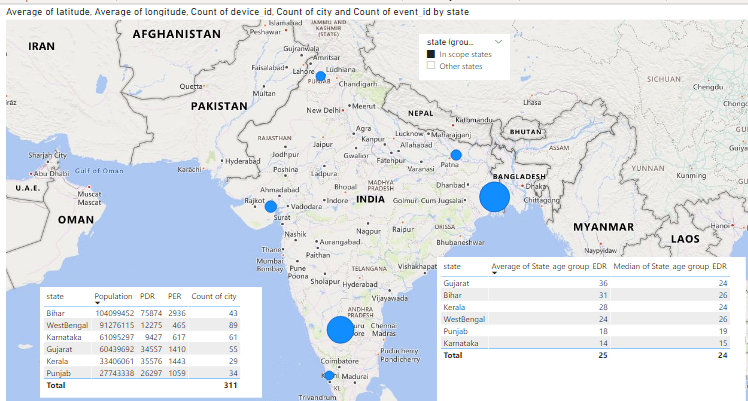

**Observation** :
West Bengal, Karnataka and Punjab are the top 3 states with respect to device & events per capita whereas Bihar, Kerala & Gujarat have potential for improvement in population to device & population to event ratio.

Gujarat, Bihar & Kerala have more number of events generated per user while Karnataka, Punjab and West Bengal users generate comparatively lesser number of events

**Which are the top cities across the 6 states contributing to majority of the events?**

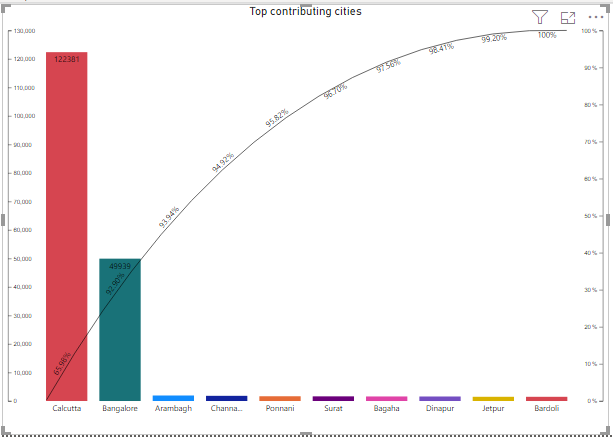

**Observation**: Calcutta and Bangalore combined together contrbute to 93% of the events generated across the 6 target states

**Which cities contribute to majority of the events for each state?**

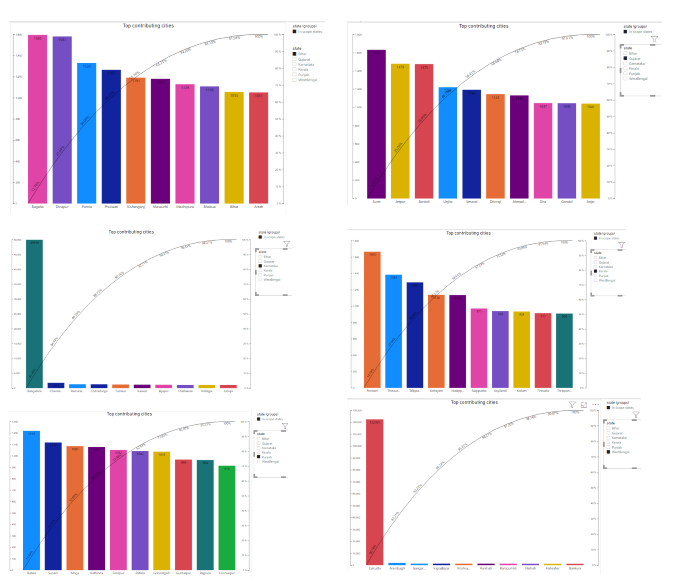

**Observation**: 

Excluding Karnataka and West Bengal, the events are almost evenly distributed between different cities for the other 4 states.

Karnataka & West Bengal have a high concentration (>80%) of events in their capital cities (Bangalore and Calcutta respectively) 


**Which are the 15 top selling brands across the 6 states?**

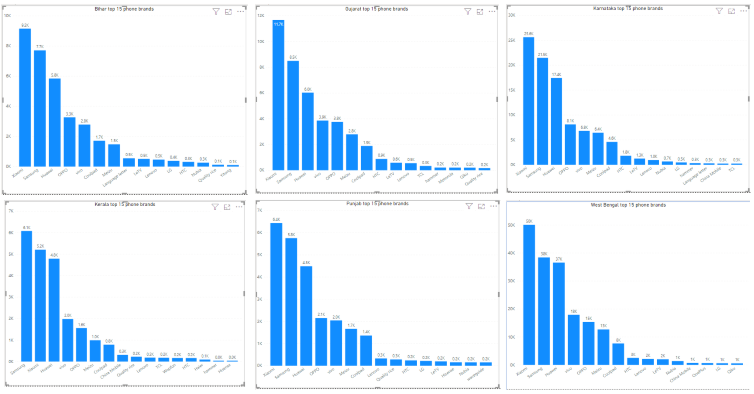

**Observations** : 

Xiaomi is the top selling brand in 5 out of the 6 states, followed by Samsung & Huawei. Samsung is the leading brand in Kerala.

Huawei is the 3rd most selling brand in all the 6 states.

Xiaomi, Samsung and Huawei are amongst the top 3 brands across the nation as well as the 6 target states.

Vivo & Oppo are close competitors for the 4th & 5th top selling brand in all the 6 states.

Meizu is the 6th top selling brand in 5 of the 6 states, followed by Coolpad. Coolpad is the 6th top selling brand in Bihar.

There are variations in top selling brands from number 8 to number 15 between the states.

**How many device models are available for the 7 top selling brands?**

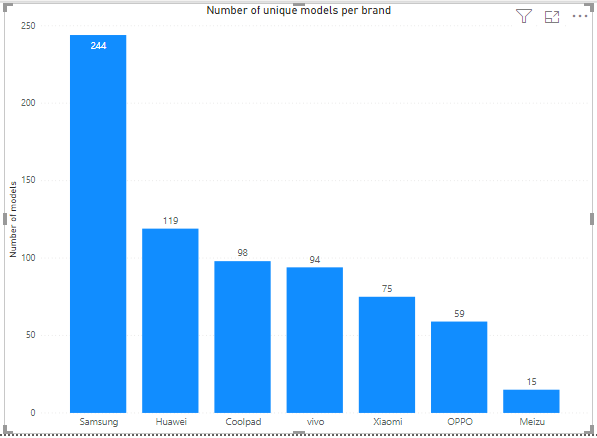

**Observation** : Though Samsung provides more variety in terms of device models, it is still not the top selling brand in 5 of the 6 states

**Which are the 10 top selling devices across the 6 states?**

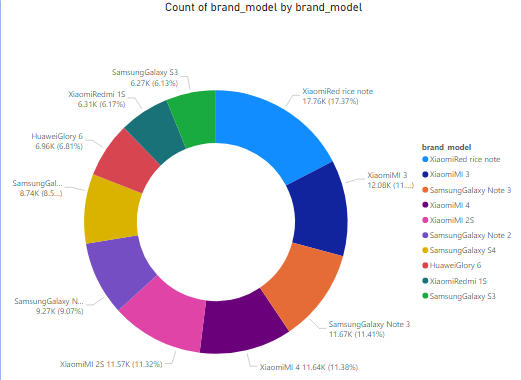

**Observation** : Xiaomi red rice note is the top selling device. Five of the top 10 selling devices belong to Xiaomi, 4 to Samsung and 1 of the top 10 selling devices is manufactured by Huawei